In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
sns.set_theme(color_codes=True)

In [3]:
df=pd.read_csv(r"D:\COURSES\Python\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data preprocessing

In [4]:
#check data objects unique value
df.select_dtypes(include='object').nunique()

sex       2
smoker    2
region    4
dtype: int64

EDA

<AxesSubplot:xlabel='sex', ylabel='charges'>

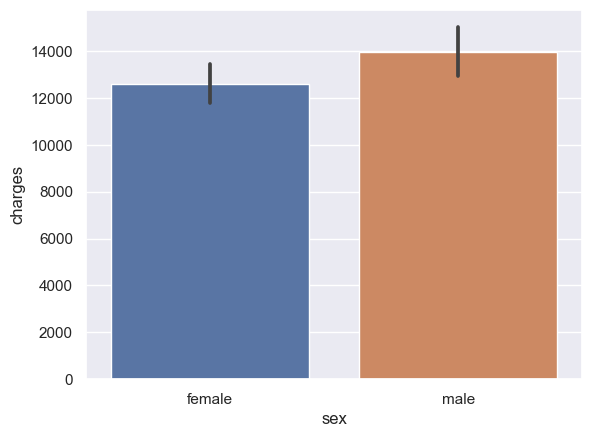

In [5]:
#creating bar plots for categorical variables
sns.barplot(x='sex', y='charges', data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

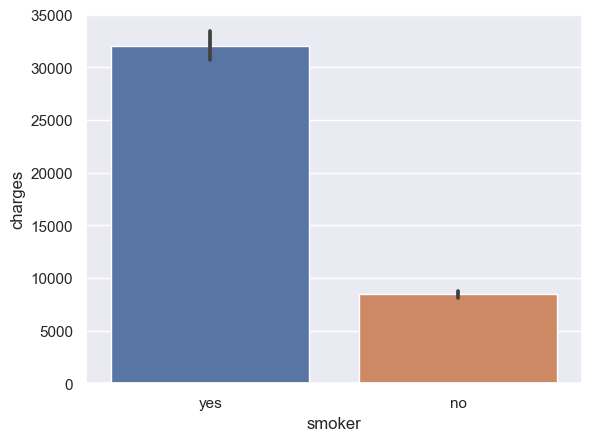

In [6]:
sns.barplot(x='smoker', y='charges', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

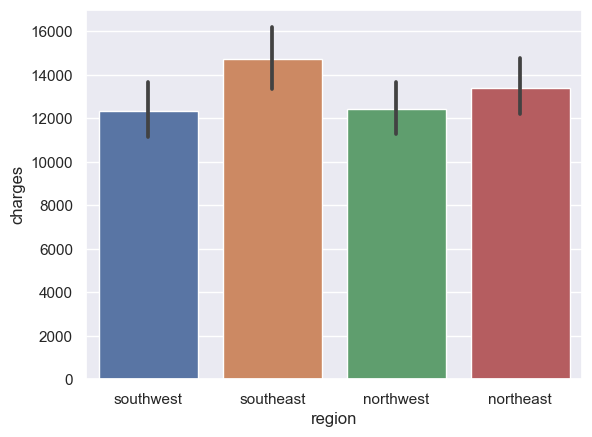

In [7]:
sns.barplot(x='region', y='charges', data=df)

<AxesSubplot:xlabel='age'>

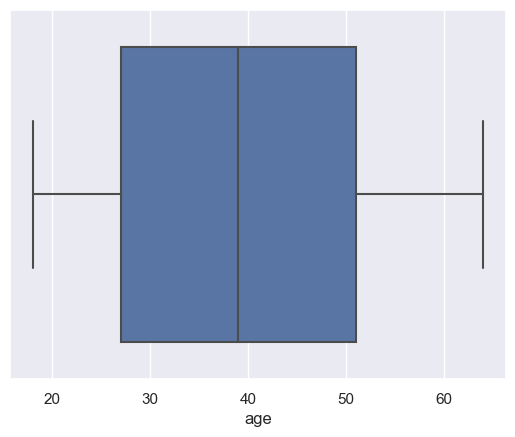

In [8]:
#create boxplots for numerical variables
fig=figsize=(12,9)
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='bmi'>

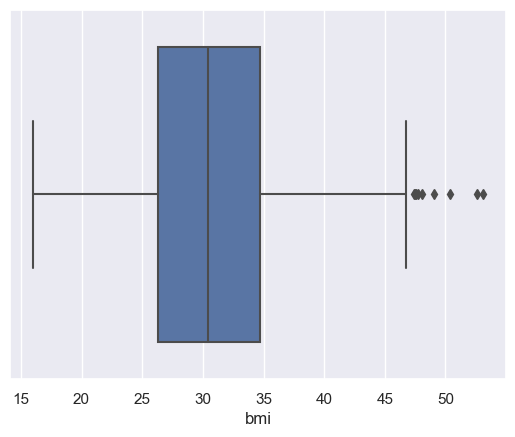

In [9]:
fig=figsize=(12,9)
sns.boxplot(x='bmi',data=df)

<AxesSubplot:xlabel='children'>

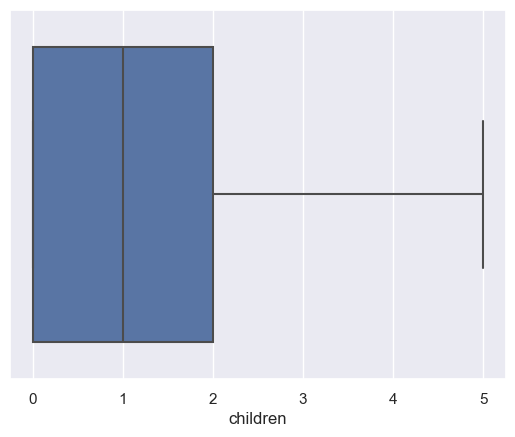

In [10]:
fig=figsize=(12,9)
sns.boxplot(x='children',data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

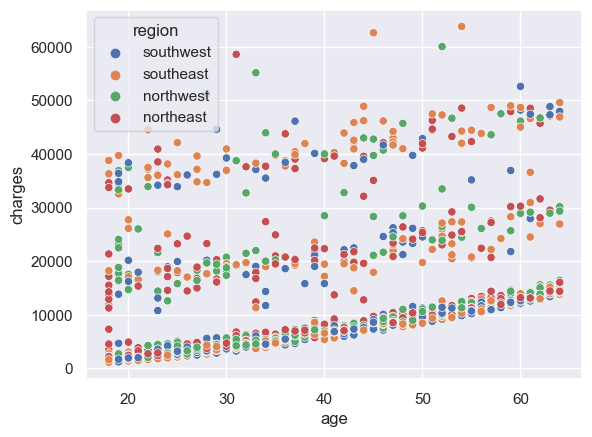

In [11]:
fig=figure=(6,4)
sns.scatterplot(x='age',y='charges',hue='region',data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

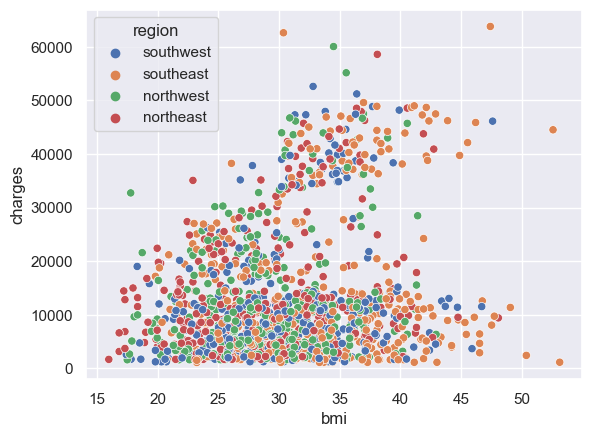

In [12]:
fig=figure=(6,4)
sns.scatterplot(x='bmi',y='charges',hue='region',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

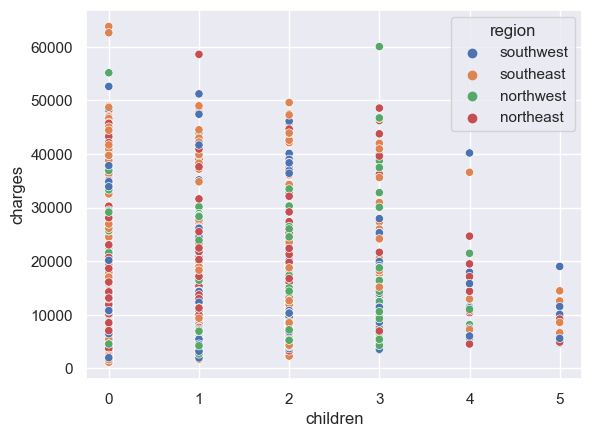

In [13]:
fig=figure=(6,4)
sns.scatterplot(x='children',y='charges',hue='region',data=df)

<AxesSubplot:xlabel='age'>

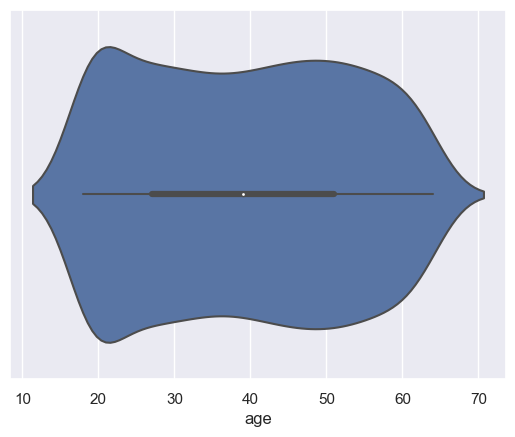

In [14]:
#violin plot for the numerical variables

fi=figsize=(6,4)
sns.violinplot(x='age',data=df)

<AxesSubplot:xlabel='bmi'>

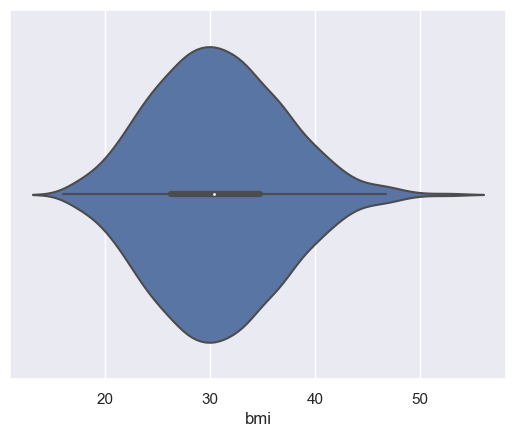

In [15]:
fig=figsize=(6,4)
sns.violinplot(x='bmi',data=df)

<AxesSubplot:xlabel='children'>

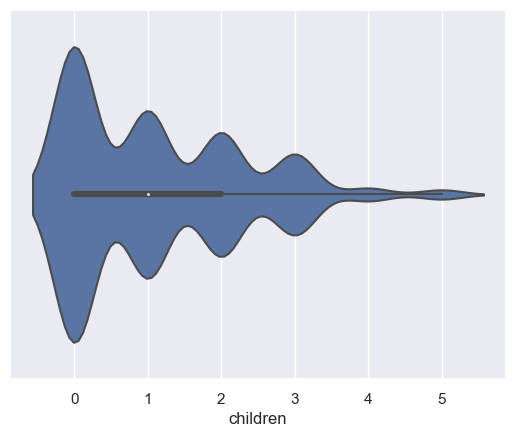

In [16]:
fig=figsize=(6,4)
sns.violinplot(x='children',data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

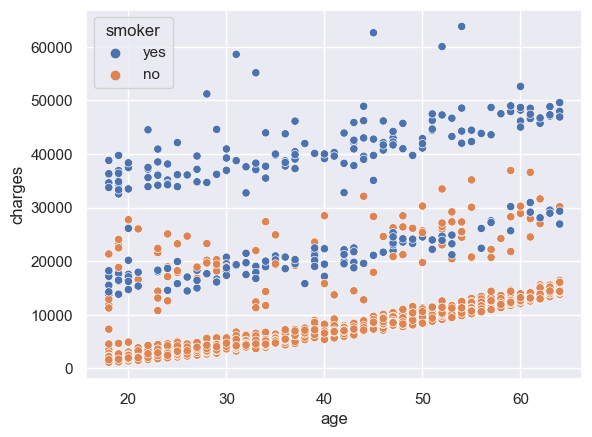

In [17]:
fig=figsize=(4,2)
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

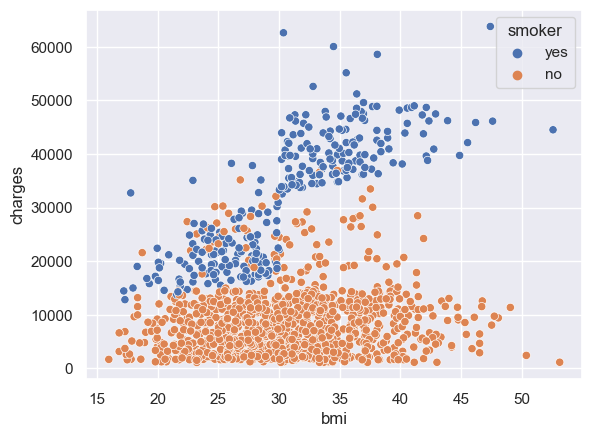

In [18]:
fig=figsize=(4,2)
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

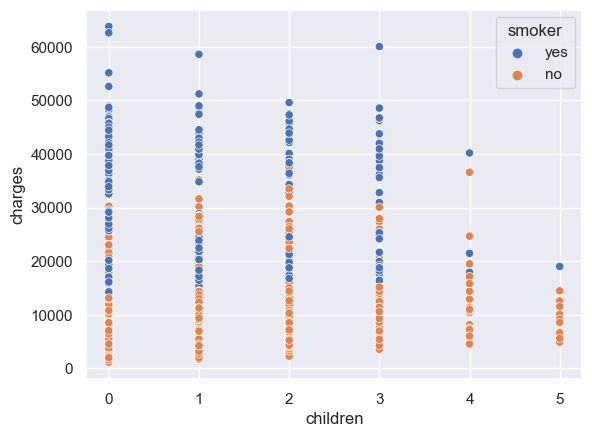

In [19]:
fig=figsize=(4,2)
sns.scatterplot(x='children',y='charges',hue='smoker',data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

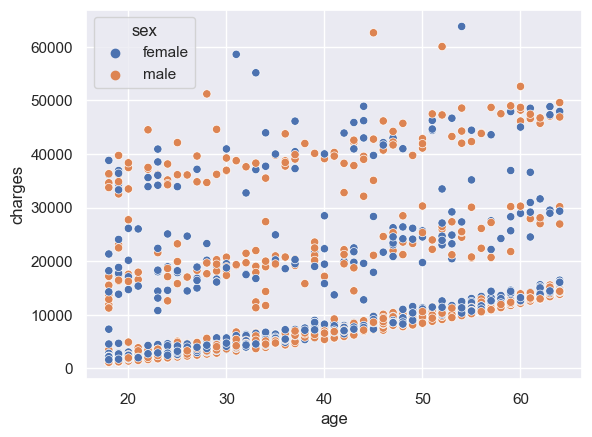

In [20]:
fig=figsize=(4,2)
sns.scatterplot(x='age',y='charges',hue='sex',data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

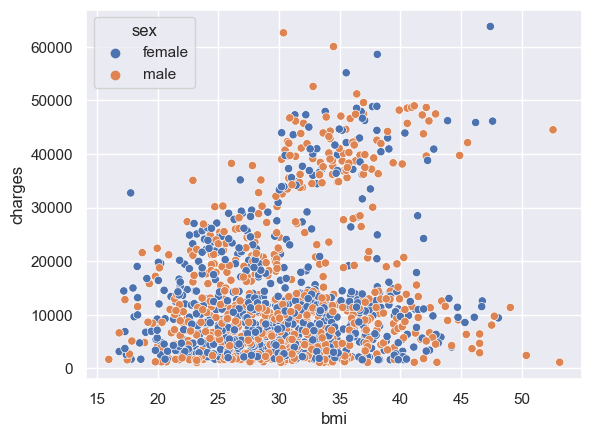

In [21]:
fig=figsize=(4,2)
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

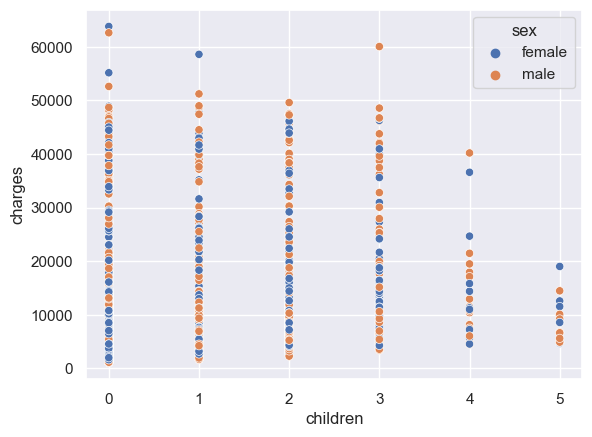

In [22]:
fig=figsize=(4,2)
sns.scatterplot(x='children',y='charges',hue='sex',data=df)

Data Preprocessing

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df.shape

(1338, 7)

In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Label Encoding Categorical variables

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.region=le.fit_transform(df.region)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

Correlation Heatmap

<AxesSubplot:>

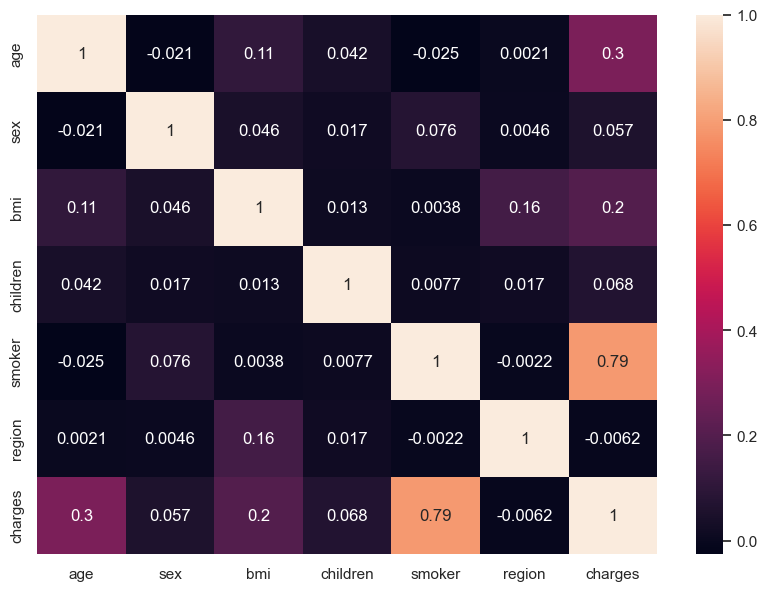

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

Train Test Split

In [30]:
X=df.drop('charges',axis=1)
y=df['charges']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Decision Tree Regressor


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston

In [33]:
dtree=DecisionTreeRegressor()

In [34]:
#tunning hyperparameters
param_grid={
    'max_depth':[3,18,14,17,22,30],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [35]:
#gridsearchcv
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 18, 14, 17, 22, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [36]:
print(grid_search.best_params_)

{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(random_state=0,max_depth=3,max_features='auto',min_samples_leaf=1,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=0)

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math

In [39]:
y_pred=dtree.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))


MAE is 2666.469354354853
MAPE is 0.3504404488512387
MSE is 18774624.243695628
R2 is 0.882017038339453
RMSE is 4332.969448737855


In [40]:
imp_df=pd.DataFrame({
    'Feature Name': X_train.columns,
    "Importance":dtree.feature_importances_
})


Text(0, 0.5, 'Feature Name')

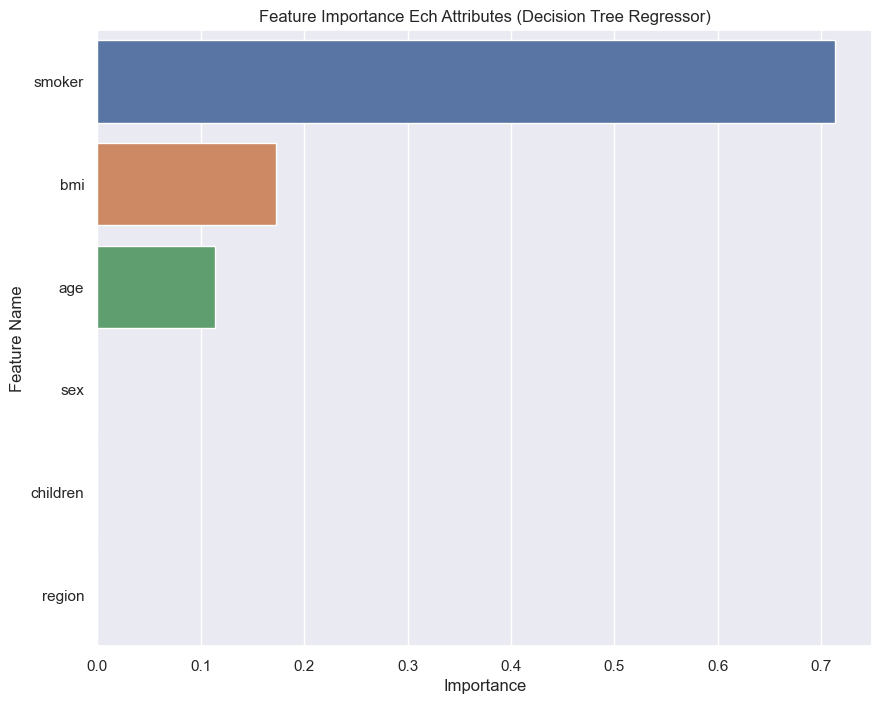

In [41]:
fi=imp_df.sort_values(by='Importance',ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title("Feature Importance Ech Attributes (Decision Tree Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

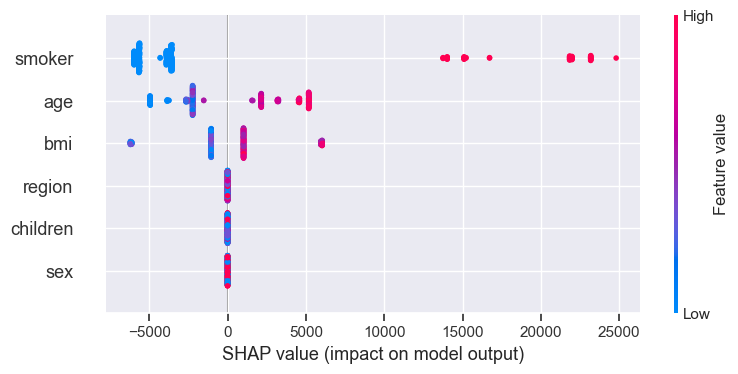

In [42]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

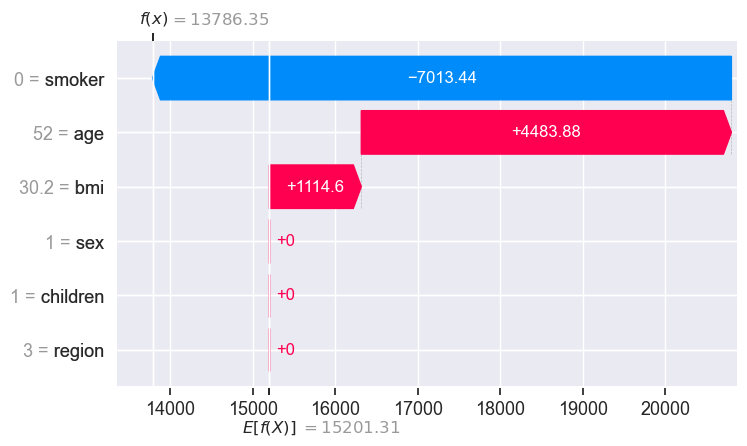

In [43]:
explainer=shap.Explainer(dtree,X_test)
shap_values=explainer(X_test)
shap.plots.waterfall(shap_values[0])

Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid={
    'max_depth': [3,5,6,8,9],
    'max_features': ['sqrt','auto'],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [52]:
#creating a GridSearchCV object
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')

#fitting the GridSearchCV object to the training data
grid_search.fit(X_train,y_train)

#print the hyperparameters
print("Best hyperparameters: ",grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0, max_depth=5,max_features='auto', min_samples_leaf=4,min_samples_split=10)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      random_state=0)

In [55]:
y_pred=dtree.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

MAE is 2666.469354354853
MAPE is 0.3504404488512387
MSE is 18774624.243695628
R2 is 0.882017038339453
RMSE is 4332.969448737855


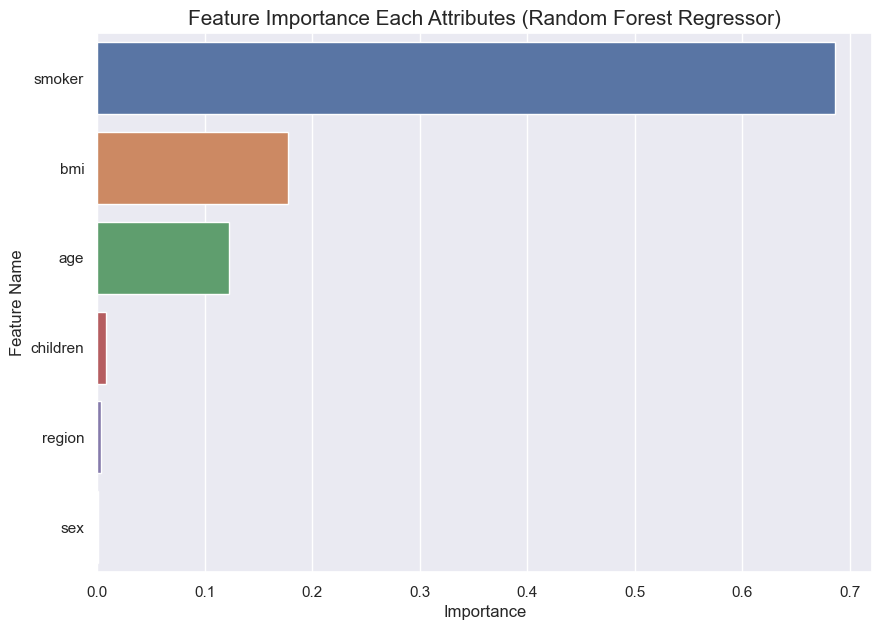

In [61]:
imp_df=pd.DataFrame({
    'Feature Name': X_train.columns,
    "Importance":rf.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,7))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title("Feature Importance Each Attributes (Random Forest Regressor)",fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show()

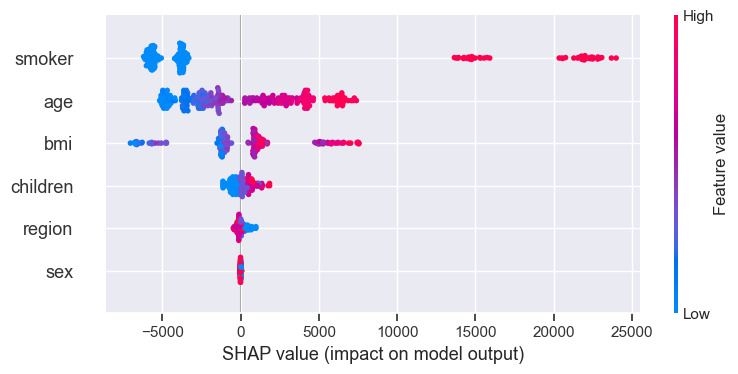

In [62]:
import shap
explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

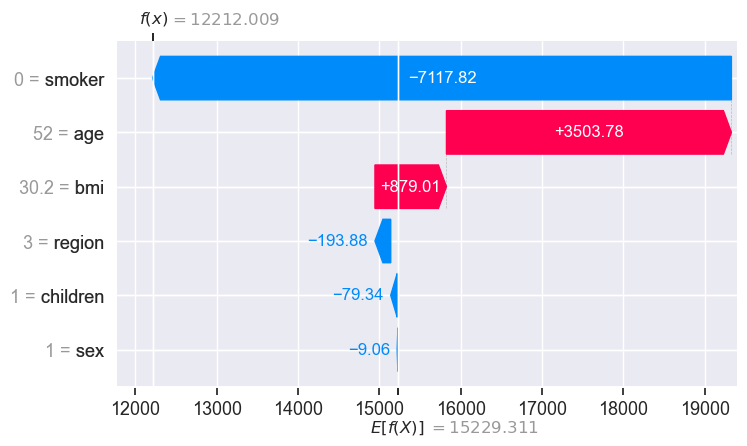

In [63]:
explainer=shap.Explainer(rf,X_test,check_addivity=False)
shap_values=explainer(X_test,check_additivity=False)
shap.plots.waterfall(shap_values[0])

AdaBoost Regressor

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.model_selection import GridSearchCV

In [69]:
params={
    'n_estimators':[50,100,150],
    'learning_rate':[0.01,0.1,1,10],
    'loss':['linear','square','exponential']
}

In [70]:
grid_search=GridSearchCV(ada,params,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [71]:
print('Best hyperparameters: ',grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}


In [75]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=0,learning_rate= 0.01, loss='exponential', n_estimators= 100)
ada.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=100,
                  random_state=0)

In [76]:
y_pred=dtree.predict(X_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RMSE is {}'.format(rmse))

MAE is 2666.469354354853
MAPE is 0.3504404488512387
MSE is 18774624.243695628
R2 is 0.882017038339453
RMSE is 4332.969448737855


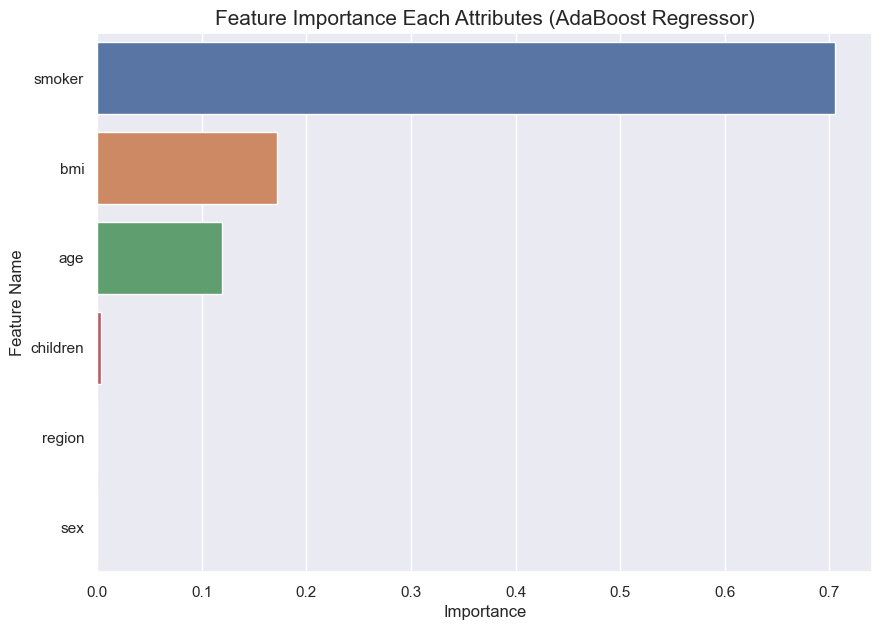

In [79]:
imp_df=pd.DataFrame({
    'Feature Name': X_train.columns,
    "Importance":ada.feature_importances_
})
fi=imp_df.sort_values(by='Importance',ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,7))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title("Feature Importance Each Attributes (AdaBoost Regressor)",fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show()